In [1]:
import numpy as np
import csv
import math
import matplotlib.pyplot as plt
import sys
import pandas as pd
import seaborn as sns

## Adelie Penguin Census
* data are on 5 different but adjacent islands: TOR, HOM, COR, CHR, LIT
* contains number of breeding pairs on the island colony

In [32]:
fname = "Adelie Penguin Census.csv"
df = pd.read_csv(fname, encoding = "ISO-8859-1")
df

,studyName,Date GMT,Island,Colony,Breeding Pairs
0,PAL9192,1991-11-03,TOR,1.0,143
1,PAL9192,1991-11-03,TOR,2.0,65
2,PAL9192,1991-11-03,TOR,3.0,25
3,PAL9192,1991-11-03,TOR,4.0,306
4,PAL9192,1991-11-03,TOR,5.0,134
...,...,...,...,...,...
1484,PAL1718,2017-11-24,TOR,20.0,9
1485,PAL1718,2017-11-24,TOR,21.0,0
1486,PAL1718,2017-11-24,TOR,22.0,0
1487,PAL1718,2017-11-24,TOR,23.0,0


In [33]:
# check and clean data
print(df['studyName'].unique())
print(df['Date GMT'].unique())
print(df['Island'].unique())
print(df['Colony'].unique())
print(df['Breeding Pairs'].unique())
breeding_pair_values = df['Breeding Pairs'].unique()
print(max(breeding_pair_values), min(breeding_pair_values))

['PAL9192' 'PAL9293' 'PAL9394' 'PAL9495' 'PAL9596' 'PAL9697' 'PAL9798'
 'PAL9899' 'PAL9900' 'PAL0001' 'PAL0102' 'PAL0203' 'PAL0304' 'PAL0405'
 'PAL0506' 'PAL0607' 'PAL0708' 'PAL0809' 'PAL0910' 'PAL1011' 'PAL1112'
 'PAL1213' 'PAL1314' 'PAL1415' 'PAL1516' 'PAL1617' 'PAL1718']
['1991-11-03' '1991-12-03' '1991-12-07' '1992-11-24' '1992-11-25'
 '1993-11-27' '1993-11-29' '1994-11-29' '1994-11-30' '1994-12-02'
 '1994-12-08' '1994-12-14' '1995-11-21' '1995-11-22' '1996-11-18'
 '1996-11-19' '1996-11-20' '1996-11-22' '1997-11-23' '1997-11-24'
 '1997-11-26' '1997-12-26' '1998-12-10' '1998-12-16' '1999-11-17'
 '1999-11-19' '2000-11-17' '2000-11-19' '2000-11-23' '2000-11-24'
 '2001-11-19' '2001-11-21' '2002-11-16' '2002-11-18' '2002-11-21'
 '2003-11-18' '2003-11-21' '2003-11-22' '2003-11-23' '2003-11-24'
 '2003-11-27' '2003-11-28' '2004-11-18' '2004-11-23' '2004-11-24'
 '2004-11-30' '2004-12-06' '2005-11-18' '2005-11-21' '2006-11-15'
 '2007-11-19' '2007-11-20' '2008-11-16' '2009-11-21' '2009-11-22'

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studyName       1489 non-null   object 
 1   Date GMT        1489 non-null   object 
 2   Island          1489 non-null   object 
 3   Colony          1489 non-null   float64
 4   Breeding Pairs  1489 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 58.3+ KB


In [35]:
df["Date"] = pd.to_datetime(df["Date GMT"])

In [37]:
df = df.astype({
    "studyName": str,
    "Island": "category",
    "Colony": "category",
    "Breeding Pairs": int
})

In [38]:
df

,studyName,Date GMT,Island,Colony,Breeding Pairs,Date
0,PAL9192,1991-11-03,TOR,1.0,143,1991-11-03
1,PAL9192,1991-11-03,TOR,2.0,65,1991-11-03
2,PAL9192,1991-11-03,TOR,3.0,25,1991-11-03
3,PAL9192,1991-11-03,TOR,4.0,306,1991-11-03
4,PAL9192,1991-11-03,TOR,5.0,134,1991-11-03
...,...,...,...,...,...,...
1484,PAL1718,2017-11-24,TOR,20.0,9,2017-11-24
1485,PAL1718,2017-11-24,TOR,21.0,0,2017-11-24
1486,PAL1718,2017-11-24,TOR,22.0,0,2017-11-24
1487,PAL1718,2017-11-24,TOR,23.0,0,2017-11-24


In [110]:
# ignore island/colony, sum breeding pairs on all islands
count_year_data = df[["Breeding Pairs", "Date GMT"]].groupby(["Date GMT"], as_index=False)["Breeding Pairs"].sum()
count_year_data

,Date GMT,Breeding Pairs
0,1991-11-03,3016
1,1991-12-03,3176
2,1991-12-07,497
3,1992-11-24,1941
4,1992-11-25,4373
...,...,...
66,2015-11-30,140
67,2016-11-24,187
68,2017-11-20,68
69,2017-11-21,50


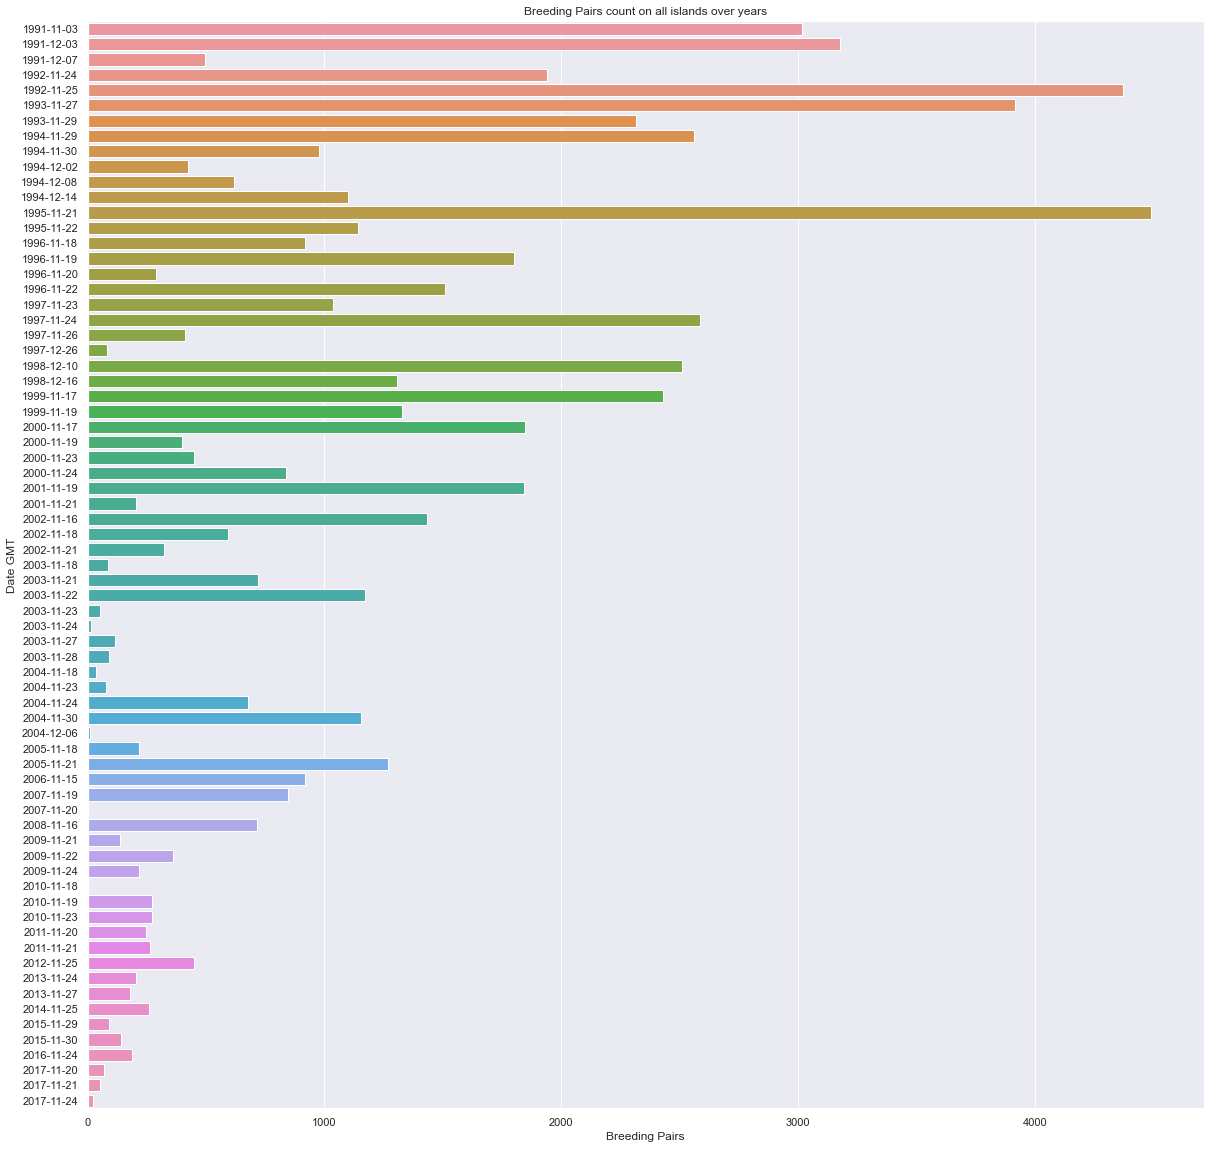

In [111]:
plt.figure(figsize=(20,20))
ax = sns.barplot(x="Breeding Pairs", y="Date GMT", data=count_year_data, ci=None).set_title("Breeding Pairs count on all islands over years")

In [112]:
# ignore colony/time, sum breeding pairs on each island over years
count_data = df[["Breeding Pairs", "Island", "Date GMT"]]\
    .groupby(["Island"], as_index=False)["Breeding Pairs"]\
    .sum()
count_data

,Island,Breeding Pairs
0,CHR,15174
1,COR,7664
2,HUM,11558
3,LIT,4337
4,TOR,27504


In [113]:
# ignore colony/time, sum breeding pairs on each island for each year
island_count_data = df[["Breeding Pairs", "Island", "Date GMT"]].groupby(["Island", "Date GMT"], as_index=False)["Breeding Pairs"].sum()
island_count_data

,Island,Date GMT,Breeding Pairs
0,CHR,1991-11-03,0
1,CHR,1991-12-03,1410
2,CHR,1991-12-07,0
3,CHR,1992-11-24,1268
4,CHR,1992-11-25,0
...,...,...,...
350,TOR,2015-11-30,51
351,TOR,2016-11-24,33
352,TOR,2017-11-20,0
353,TOR,2017-11-21,0


In [116]:
chr_df = island_count_data[island_count_data["Island"] == 'CHR']
tor_df = island_count_data[island_count_data["Island"] == 'TOR']
cor_df = island_count_data[island_count_data["Island"] == 'COR']
hum_df = island_count_data[island_count_data["Island"] == 'HUM']
lit_df = island_count_data[island_count_data["Island"] == 'LIT']

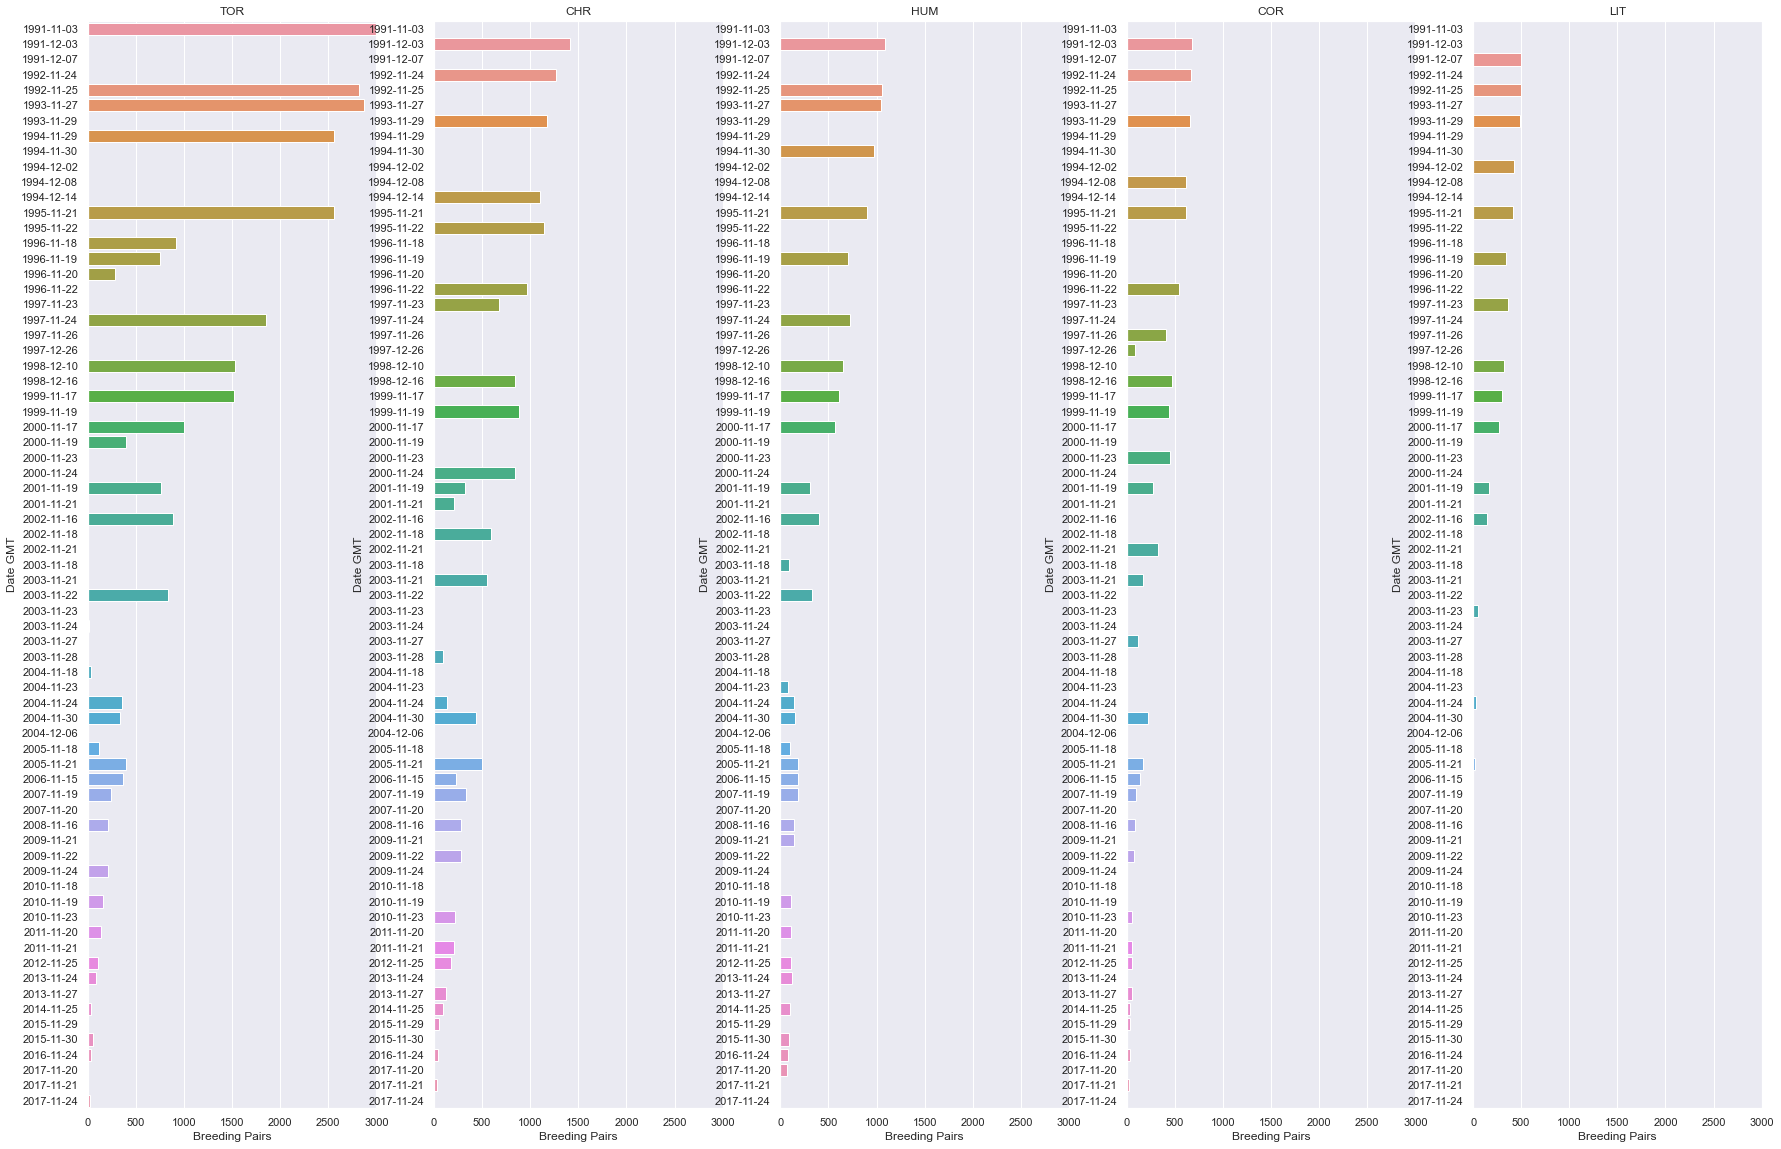

In [197]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(30,20))
sns.barplot(x="Breeding Pairs", y="Date GMT", data=tor_df, ci=None, ax=ax1).set_title("TOR")
sns.barplot(x="Breeding Pairs", y="Date GMT", data=chr_df, ci=None, ax=ax2).set_title("CHR")
sns.barplot(x="Breeding Pairs", y="Date GMT", data=hum_df, ci=None, ax=ax3).set_title("HUM")
sns.barplot(x="Breeding Pairs", y="Date GMT", data=cor_df, ci=None, ax=ax4).set_title("COR")
sns.barplot(x="Breeding Pairs", y="Date GMT", data=lit_df, ci=None, ax=ax5).set_title("LIT")
ax1.set_xlim(0, 3000)
ax2.set_xlim(0, 3000)
ax3.set_xlim(0, 3000)
ax4.set_xlim(0, 3000)
ax5.set_xlim(0, 3000)
plt.show()

## Adelie Penguin Population Arrival
* all data on Humble (HUM) island
* contains number of adults arrived

In [127]:
fname = "Adelie Penguin Population Arrival.csv"
df = pd.read_csv(fname, encoding = "ISO-8859-1")
df

,studyName,Date GMT,Island,Colony,Adults
0,PAL9192,1991-10-20,HUM,1.1,24
1,PAL9192,1991-10-20,HUM,1.2,23
2,PAL9192,1991-10-20,HUM,1.3,5
3,PAL9192,1991-10-20,HUM,2.1,94
4,PAL9192,1991-10-20,HUM,2.2,57
...,...,...,...,...,...
3028,PAL1718,2018-01-27,HUM,5.0,0
3029,PAL1718,2018-02-01,HUM,2.1,4
3030,PAL1718,2018-02-01,HUM,2.2,15
3031,PAL1718,2018-02-01,HUM,3.0,14


In [153]:
df["Date"] = pd.to_datetime(df["Date GMT"])
df["Date"]

0      1991-10-20
1      1991-10-20
2      1991-10-20
3      1991-10-20
4      1991-10-20
          ...    
3028   2018-01-27
3029   2018-02-01
3030   2018-02-01
3031   2018-02-01
3032   2018-02-01
Name: Date, Length: 3033, dtype: datetime64[ns]

In [189]:
# ignore colony, sum breeding pairs on Humble islands for each day
count_date_data = df[["Adults", "Date GMT", "Date"]].groupby(["Date GMT", "Date"], as_index=False)["Adults"].sum()
count_date_data

,Date GMT,Date,Adults
0,1991-10-20,1991-10-20,203
1,1991-10-23,1991-10-23,399
2,1991-10-25,1991-10-25,465
3,1991-10-27,1991-10-27,535
4,1991-10-29,1991-10-29,578
...,...,...,...
697,2018-01-10,2018-01-10,73
698,2018-01-16,2018-01-16,77
699,2018-01-22,2018-01-22,76
700,2018-01-27,2018-01-27,59


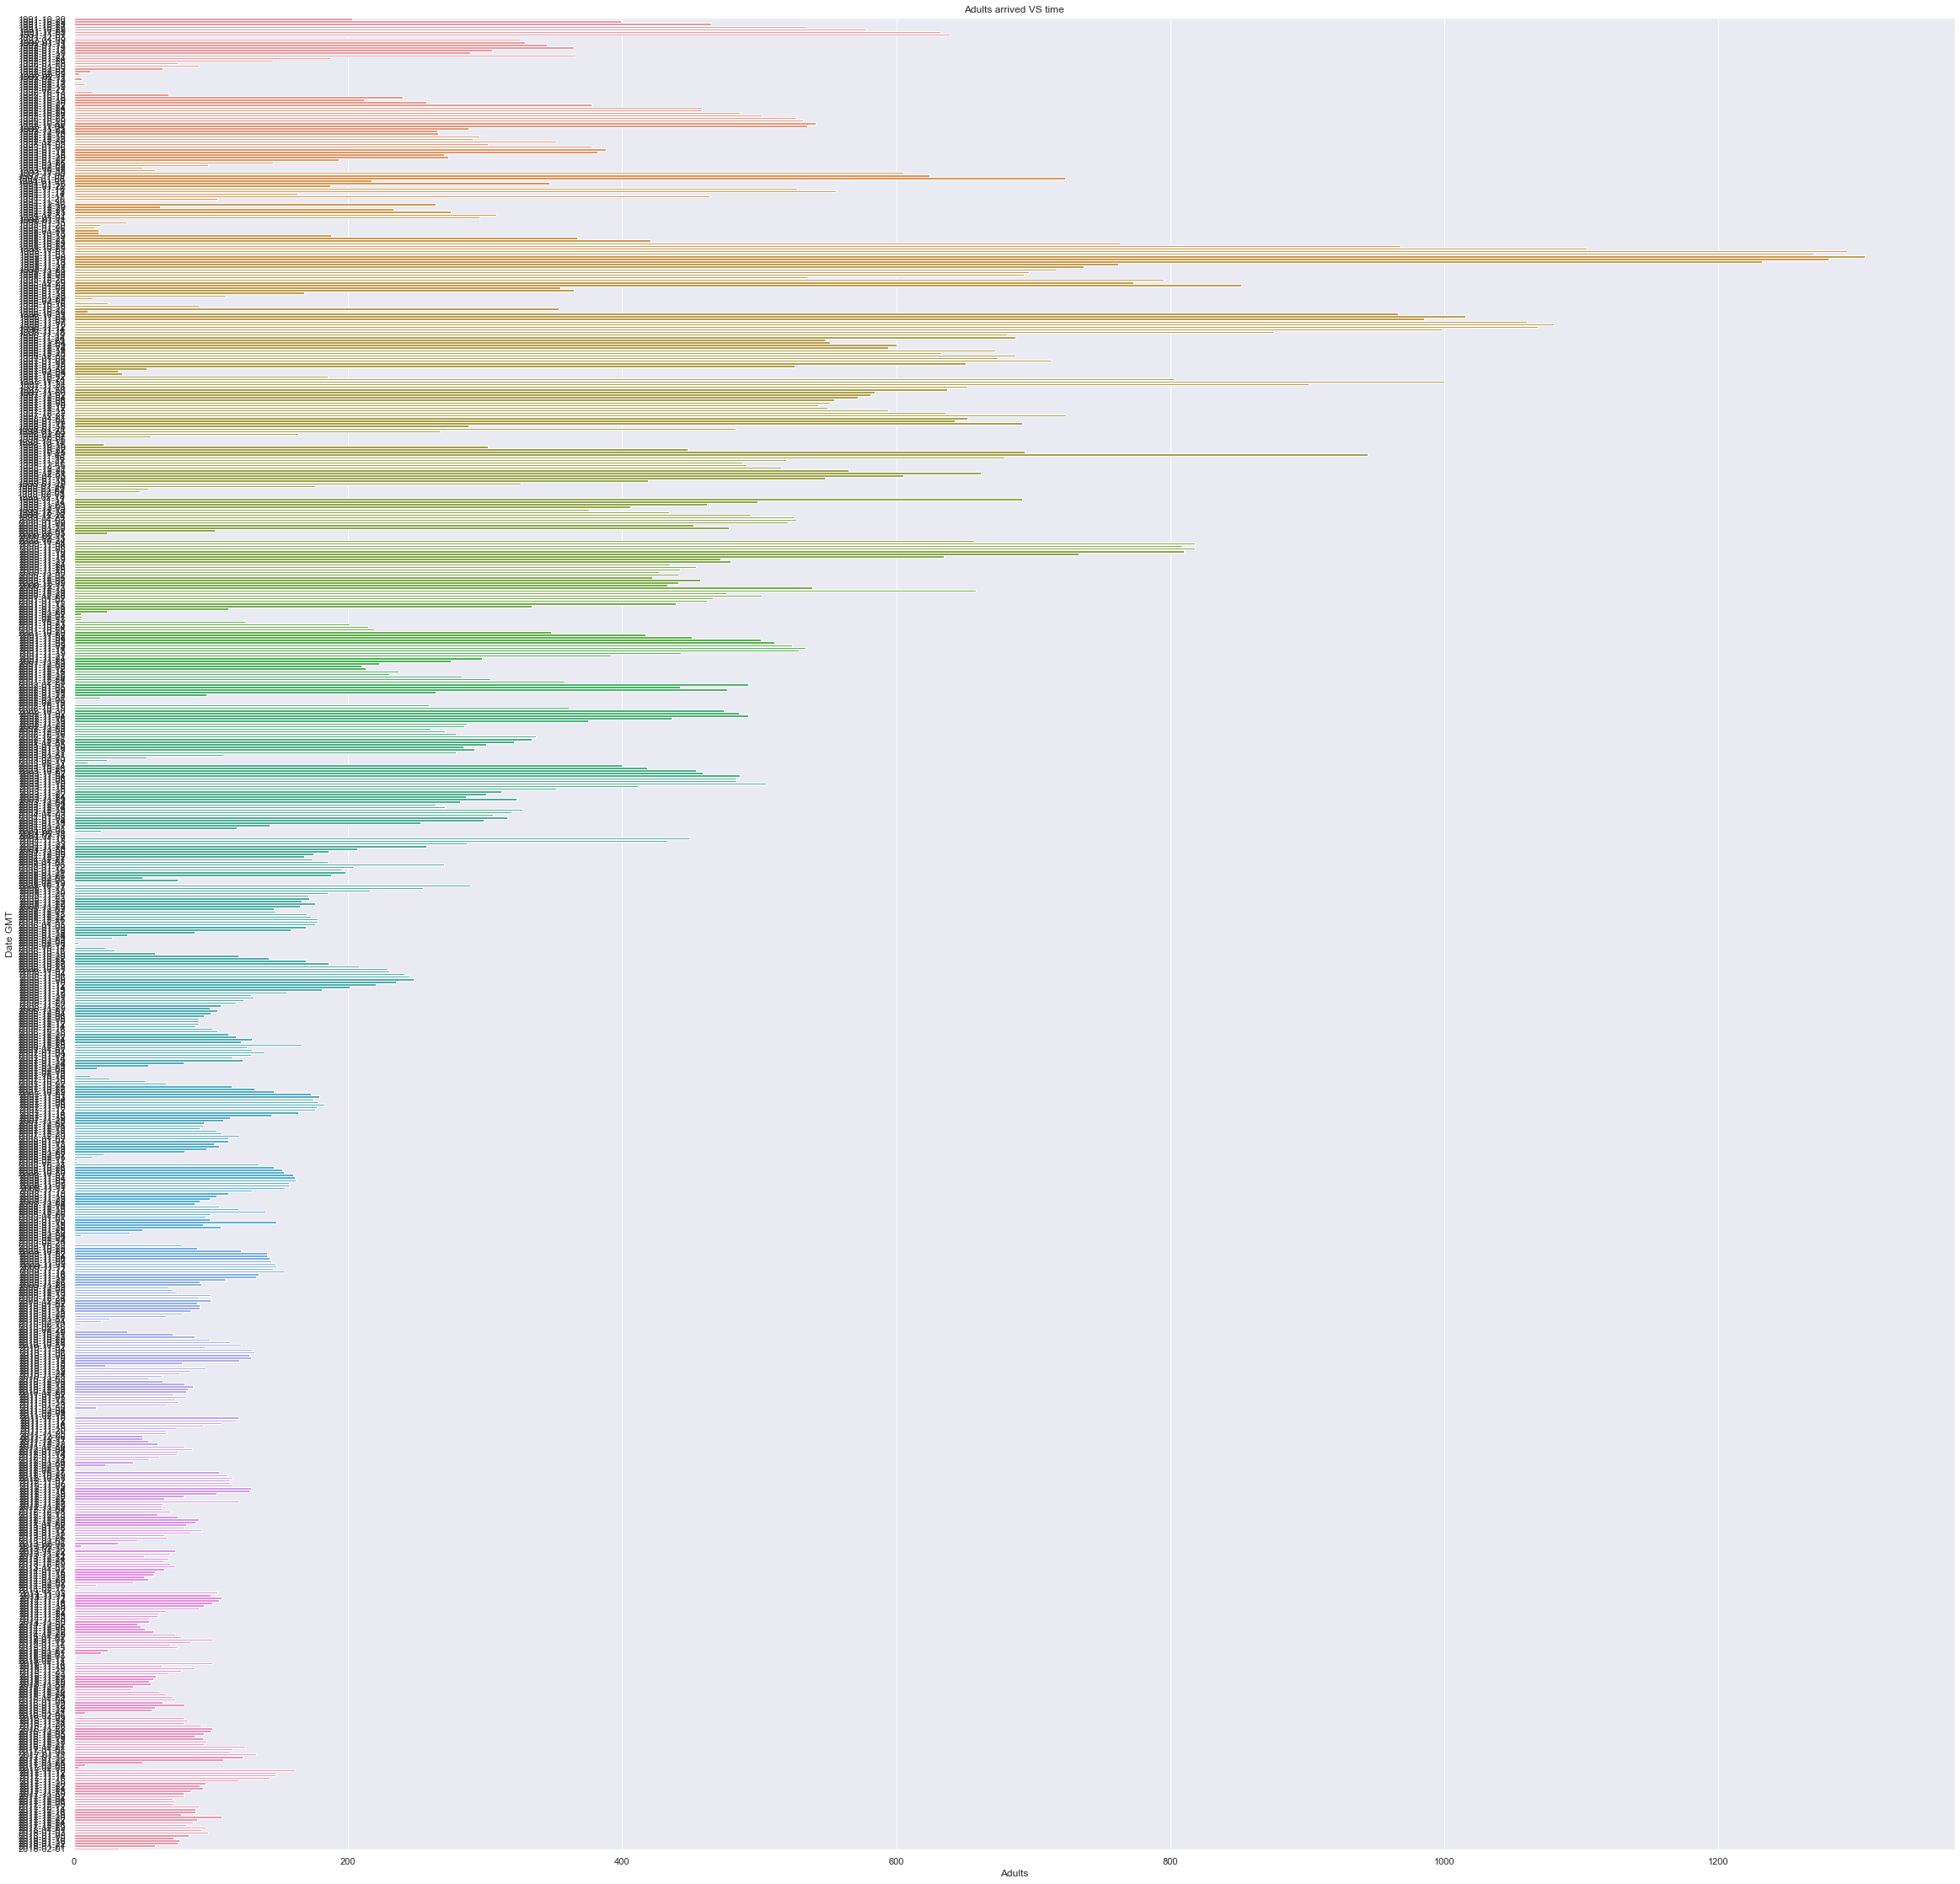

In [190]:
plt.figure(figsize=(40,40))
ax = sns.barplot(x="Adults", y="Date GMT", data=count_date_data, ci=None).\
    set_title("Adults arrived VS time")

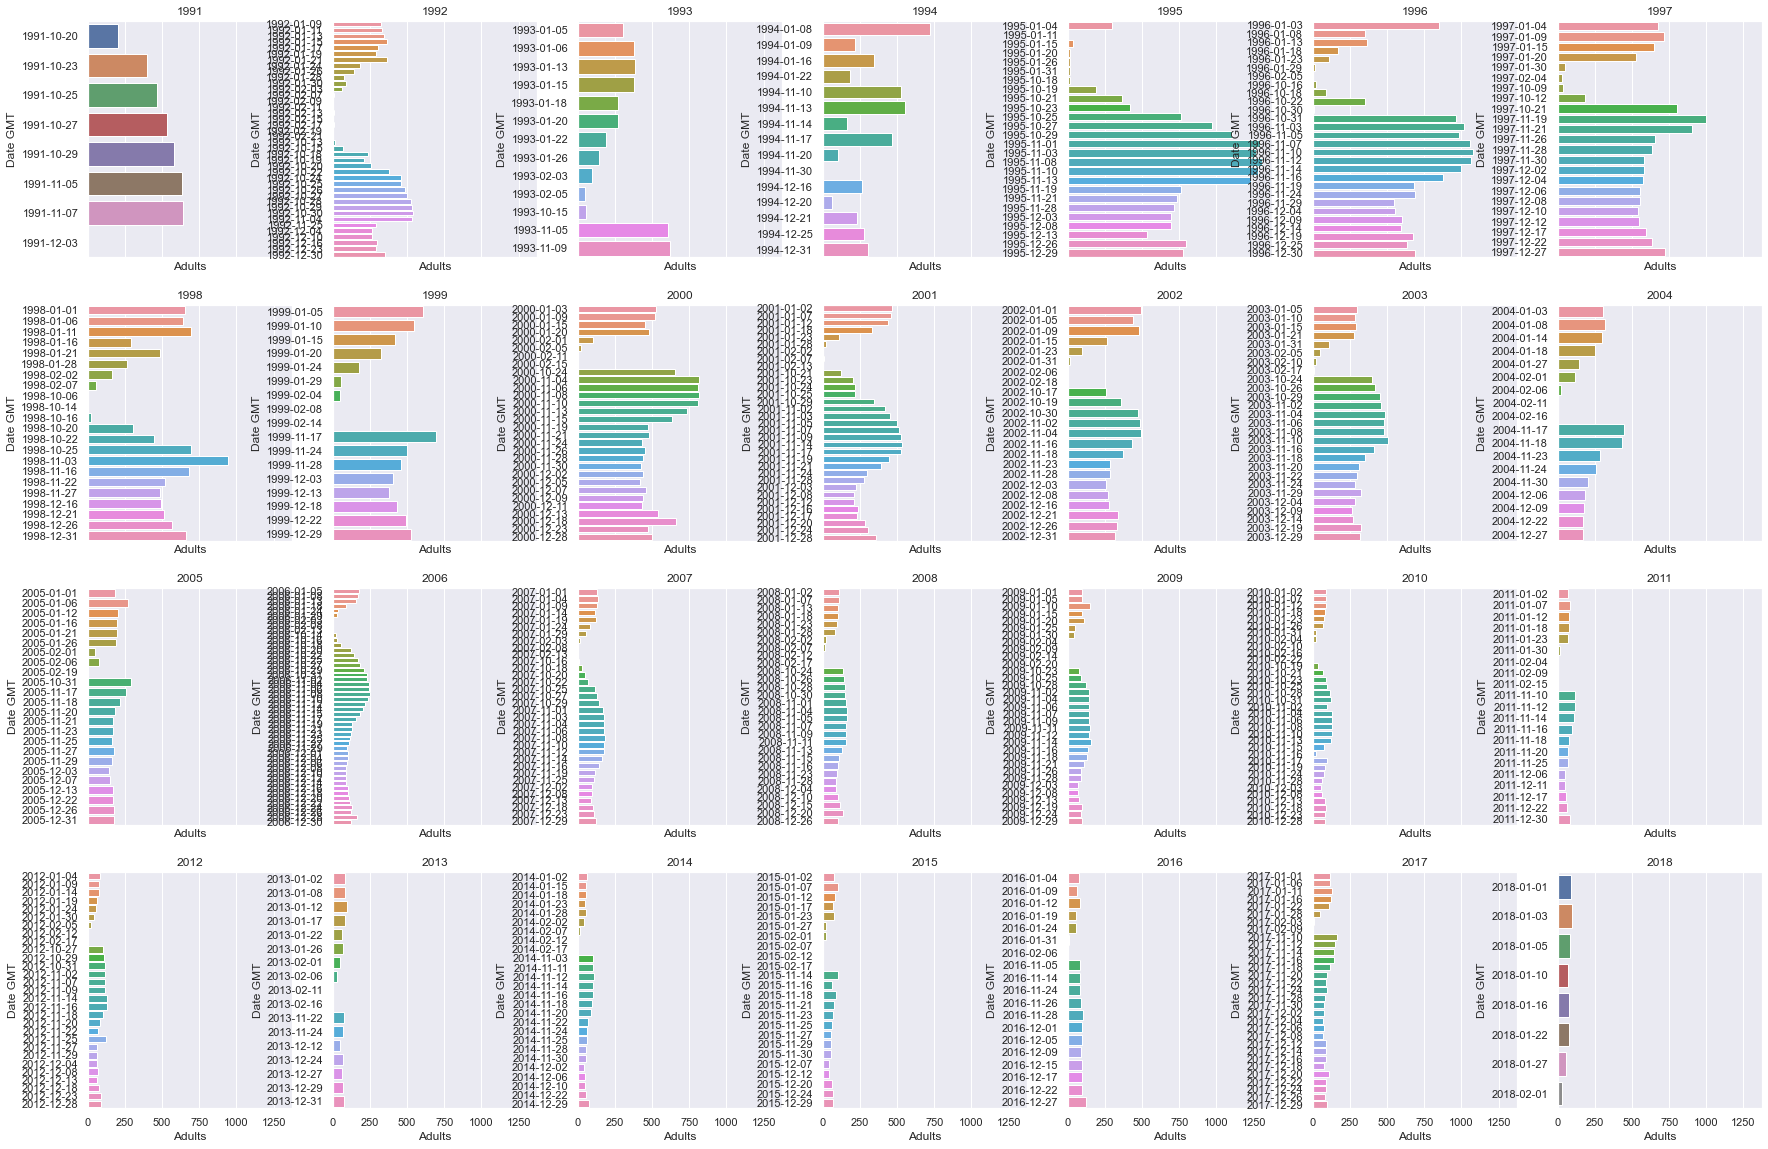

In [195]:
# too many data, need to group by years
fig, axes = plt.subplots(4, 7, figsize=(30,20), sharex=True)
ax_index = 0
for i in range(1991, 2019):
    current_year_data = count_date_data[count_date_data["Date"].dt.year == i]
    sns.barplot(x="Adults", y="Date GMT", data=current_year_data, ci=None, ax=axes.flatten()[ax_index]).set_title(i)
    ax_index += 1
plt.show()